In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import warnings
import cmocean as cmo
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import gridspec, ticker
from scipy.ndimage.filters import gaussian_filter
warnings.filterwarnings('ignore')
import seawater as sw
from dask.diagnostics import ProgressBar
from datetime import datetime
import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature


/home/bruno/miniconda3/envs/ocean/lib/python3.7/site-packages/xarray/backends/cfgrib_.py:28: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  "Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. "


In [2]:
fsource = sorted(glob.glob('/home/bruno/git/globcolour/gsm-chl/*.nc'))

In [3]:
source   =  [xr.open_dataset(i, chunks={}) for i in fsource]
time=[datetime.strptime(fi.period_start_day, '%Y%m%d') for fi in source]
source = xr.concat(source, dim='time')
source = source.assign_coords(time=time)
#source

In [ ]:
#source

In [ ]:
# print('atributos:')
# source.attrs

#### spatial mask using .sel and .where

In [4]:
# LOAD BATHYMETRY DATA

bat_dado = xr.open_dataset('/home/bruno/git/CMEMS/gebco/gebco_2020_n-20.0_s-40.0_w-60.0_e-40.0.nc')

In [5]:
CHL1_set = source.CHL1_mean.sel(lon=slice(-50.0, -40.0), lat=slice(-21.0, -28))

In [6]:
mask_bat = bat_dado.interp({'lon':CHL1_set.lon, 'lat':CHL1_set.lat}).elevation
# dado.close()
# mask_chl1.close()

In [ ]:
#print(CHL1_set)

In [ ]:
m_chl = CHL1_set.groupby("time.month").mean()

In [ ]:
jan_chl = np.log10(m_chl).sel(month=1)
feb_chl = np.log10(m_chl).sel(month=2)
mar_chl = np.log10(m_chl).sel(month=3)
apr_chl = np.log10(m_chl).sel(month=4)
may_chl = np.log10(m_chl).sel(month=5)
jun_chl = np.log10(m_chl).sel(month=6)
jul_chl = np.log10(m_chl).sel(month=7)
aug_chl = np.log10(m_chl).sel(month=8)
set_chl = np.log10(m_chl).sel(month=9)
out_chl = np.log10(m_chl).sel(month=10)
nov_chl = np.log10(m_chl).sel(month=11)
dez_chl = np.log10(m_chl).sel(month=12)

In [ ]:
diff_jan_chl = np.log10(m_chl).sel(month=1)-np.log10(m_chl).mean('month')
diff_feb_chl = np.log10(m_chl).sel(month=2)-np.log10(m_chl).mean('month')
diff_mar_chl = np.log10(m_chl).sel(month=3)-np.log10(m_chl).mean('month')
diff_apr_chl = np.log10(m_chl).sel(month=4)-np.log10(m_chl).mean('month')
diff_may_chl = np.log10(m_chl).sel(month=5)-np.log10(m_chl).mean('month')
diff_jun_chl = np.log10(m_chl).sel(month=6)-np.log10(m_chl).mean('month')
diff_jul_chl = np.log10(m_chl).sel(month=7)-np.log10(m_chl).mean('month')
diff_aug_chl = np.log10(m_chl).sel(month=8)-np.log10(m_chl).mean('month')
diff_set_chl = np.log10(m_chl).sel(month=9)-np.log10(m_chl).mean('month')
diff_out_chl = np.log10(m_chl).sel(month=10)-np.log10(m_chl).mean('month')
diff_nov_chl = np.log10(m_chl).sel(month=11)-np.log10(m_chl).mean('month')
diff_dez_chl = np.log10(m_chl).sel(month=12)-np.log10(m_chl).mean('month')

#### plot

In [7]:
lat, lon = CHL1_set.lat, CHL1_set.lon

In [ ]:
### cartopy definitions


land_resolution = '10m'
land_poly = cfeature.NaturalEarthFeature('physical', 'land', land_resolution,
                                        edgecolor='k',
                                        facecolor=cfeature.COLORS['land'])

In [ ]:
### CARTOPY SUBPLOT ###

#%%capture

fig1 = plt.figure(figsize=(12, 12), dpi=300)

gs  = gridspec.GridSpec(4, 3)



m = plt.subplot(gs[0,0], projection=ccrs.PlateCarree(central_longitude=0.0))
f1 = plt.pcolormesh(lon, lat, jan_chl, shading='flat', cmap='Spectral_r')
m.coastlines(resolution=land_resolution, color='black', linewidth=1)
m.add_feature(land_poly)
g1 = m.gridlines(linestyle='--', draw_labels = False)
g1.xlabels_top = False
g1.xlabels_bottom = False
g1.ylabels_left = False
g1.ylabels_right = False
g1.xlabel_style = {'size': 12, 'color': 'black'}
g1.ylabel_style = {'size': 12, 'color': 'black'}
#cbar = plt.colorbar(f1, orientation="horizontal", fraction=0.09, pad=0.09, extend ='both') 
#cbar.ax.set_xticklabels(['0.01','0.1','0.5','1','3','10','50'], fontsize=20) 
plt.contour(lon,lat,mask_bat,levels=[-200],colors=['black'])
#cbar.set_label('Chlorophyll, mg.m$^{-3}$', fontsize=20)
plt.title('jan', fontsize=12)

#plot feb
m2 = plt.subplot(gs[1,0], projection=ccrs.PlateCarree(central_longitude=0.0))
f2 = plt.pcolormesh(lon, lat, apr_chl, shading='flat', cmap='Spectral_r')
m2.coastlines(resolution=land_resolution, color='black', linewidth=1)
m2.add_feature(land_poly)
g2 = m2.gridlines(linestyle='--', draw_labels = False)
g2.xlabels_top_= False
g2.xlabels_bottom = False
g2.ylabels_left = False
g2.ylabels_right = False
g2.xlabel_style = {'size': 12, 'color': 'black'}
g2.ylabel_style = {'size': 12, 'color': 'black'}
#cbar = plt.colorbar(f2, orientation="horizontal", fraction=0.09, pad=0.09,extend='both') #ticks=[np.log10(0.01), np.log10(0.1),np.log10(1),np.log10(1.5),np.log10(2)]) 
#cbar.ax.set_xticklabels(['0.01','0.1','0.5','1'], fontsize=20) 
plt.contour(lon,lat,mask_bat,levels=[-200],colors=['black'])
#cbar.set_label('Chlorophyll, mg.m$^{-3}$', fontsize=20)
plt.title('abril', fontsize=12)

#plot mar
m3 = plt.subplot(gs[2,0], projection=ccrs.PlateCarree(central_longitude=0.0))
f3 = plt.pcolormesh(lon, lat, jul_chl, shading='flat', cmap='Spectral_r')
m3.coastlines(resolution=land_resolution, color='black', linewidth=1)
m3.add_feature(land_poly)
g3 = m3.gridlines(linestyle='--', draw_labels = False)
g3.xlabels_top_= False
g3.xlabels_bottom = False
g3.xlabels_left = False
g3.ylabels_right = False
g3.xlabel_style = {'size': 12, 'color': 'black'}
g3.ylabel_style = {'size': 12, 'color': 'black'}
#cbar = plt.colorbar(f3, orientation="horizontal", fraction=0.09, pad=0.09,extend='both') #ticks=[np.log10(0.01), np.log10(0.1),np.log10(1),np.log10(1.5),np.log10(2)]) 
#cbar.ax.set_xticklabels(['0.01','0.1','0.5','1','3','10','50'], fontsize=20) 
plt.contour(lon,lat,mask_bat,levels=[-200],colors=['black'])
#cbar.set_label('Chlorophyll, mg.m$^{-3}$', fontsize=20)
plt.title('julho', fontsize=12)

#plot apr

m4 = plt.subplot(gs[3,0], projection=ccrs.PlateCarree(central_longitude=0.0))
f4 = plt.pcolormesh(lon, lat, out_chl,  shading='flat', cmap='Spectral_r')
m4.coastlines(resolution=land_resolution, color='black', linewidth=1)
m4.add_feature(land_poly)
g4 = m4.gridlines(linestyle='--', draw_labels = False)
g4.xlabels_top_= False
g4.xlabels_bottom = False
g4.ylabels_left = False
g4.ylabels_right = False
g4.xlabel_style = {'size': 12, 'color': 'black'}
g4.ylabel_style = {'size': 12, 'color': 'black'}
#cbar = plt.colorbar(f4, orientation="horizontal", fraction=0.09, pad=0.09,extend='both') #ticks=[np.log10(0.01), np.log10(0.1),np.log10(1),np.log10(1.5),np.log10(2),]) 
#cbar.ax.set_xticklabels(['0.01','0.1','0.5','1','3','10','50'], fontsize=20) 
plt.contour(lon,lat,mask_bat,levels=[-200],colors=['black'])
#cbar.set_label('Chlorophyll, mg.viridis$', fontsize=20)
plt.title('out', fontsize=12)

#plot may

m5 = plt.subplot(gs[0,1], projection=ccrs.PlateCarree(central_longitude=0.0))
f5 = plt.pcolormesh(lon, lat, feb_chl, shading='flat', cmap='Spectral_r')
m5.coastlines(resolution=land_resolution, color='black', linewidth=1)
m5.add_feature(land_poly)
g5 = m5.gridlines(linestyle='--', draw_labels = False)
g5.xlabels_top= False
g5.xlabels_bottom = False
g5.ylabels_left = False
g5.ylabels_right = False
g5.xlabel_style = {'size': 12, 'color': 'black'}
g5.ylabel_style = {'size': 12, 'color': 'black'}
#cbar = plt.colorbar(f5, orientation="horizontal", fraction=0.09, pad=0.09, extend ='both') 
#cbar.ax.set_xticklabels(['0.01','0.1','0.5','1','3','10','50'], fontsize=20) 
plt.contour(lon,lat,mask_bat,levels=[-200],colors=['black'])
#cbar.set_label('Chlorophyll, mg.m$^{-3}$', fontsize=20)
plt.title('fev', fontsize=12)

#plot jun

m6 = plt.subplot(gs[1,1], projection=ccrs.PlateCarree(central_longitude=0.0))
f6 = plt.pcolormesh(lon, lat, may_chl, shading='flat', cmap='Spectral_r')
m6.coastlines(resolution=land_resolution, color='black', linewidth=1)
m6.add_feature(land_poly)
g6 = m6.gridlines(linestyle='--', draw_labels = False)
g6.xlabels_top_= False
g6.xlabels_bottom = False
g6.ylabels_left = False
g6.ylabels_right = False
g6.xlabel_style = {'size': 12, 'color': 'black'}
g6.ylabel_style = {'size': 12, 'color': 'black'}
#cbar = plt.colorbar(f6, orientation="horizontal", fraction=0.09, pad=0.09,extend='both') #ticks=[np.log10(0.01), np.log10(0.1),np.log10(1),np.log10(1.5),np.log10(2)]) 
#cbar.ax.set_xticklabels(['0.01','0.1','0.5','1'], fontsize=20) 
plt.contour(lon,lat,mask_bat,levels=[-200],colors=['black'])
#cbar.set_label('Chlorophyll, mg.m$^{-3}$', fontsize=20)
plt.title('maio', fontsize=12)

#plot jul

m7 = plt.subplot(gs[2,1], projection=ccrs.PlateCarree(central_longitude=0.0))
f7 = plt.pcolormesh(lon, lat, aug_chl, shading='flat', cmap='Spectral_r')
m7.coastlines(resolution=land_resolution, color='black', linewidth=1)
m7.add_feature(land_poly)
g7 = m7.gridlines(linestyle='--', draw_labels = False)
g7.xlabels_top_= False
g7.xlabels_bottom = False
g7.ylabels_right = False
g7.ylabels_left = False
g7.xlabel_style = {'size': 12, 'color': 'black'}
g7.ylabel_style = {'size': 12, 'color': 'black'}
#cbar = plt.colorbar(f7, orientation="horizontal", fraction=0.09, pad=0.09,extend='both') #ticks=[np.log10(0.01), np.log10(0.1),np.log10(1),np.log10(1.5),np.log10(2)]) 
#cbar.ax.set_xticklabels(['0.01','0.1','0.5','1','3','10','50'], fontsize=20) 
plt.contour(lon,lat,mask_bat,levels=[-200],colors=['black'])
#cbar.set_label('Chlorophyll, mg.m$^{-3}$', fontsize=20)
plt.title('agosto', fontsize=12)

#plot aug

m8 = plt.subplot(gs[3,1], projection=ccrs.PlateCarree(central_longitude=0.0))
f8 = plt.pcolormesh(lon, lat, nov_chl, shading='flat', cmap='Spectral_r')
m8.coastlines(resolution=land_resolution, color='black', linewidth=1)
m8.add_feature(land_poly)
g8 = m8.gridlines(linestyle='--', draw_labels = False)
g8.xlabels_top_= False
g8.xlabels_bottom = False
g8.ylabels_left = False
g8.ylabels_right = False
g8.xlabel_style = {'size': 12, 'color': 'black'}
g8.ylabel_style = {'size': 12, 'color': 'black'}
#cbar = plt.colorbar(f8, orientation="horizontal", fraction=0.09, pad=0.09,extend='both') #ticks=[np.log10(0.01), np.log10(0.1),np.log10(1),np.log10(1.5),np.log10(2),]) 
#cbar.ax.set_xticklabels(['0.01','0.1','0.5','1','3','10','50'], fontsize=20) 
plt.contour(lon,lat,mask_bat,levels=[-200],colors=['black'])
#cbar.set_label('Chlorophyll, mg.viridis$', fontsize=20)
plt.title('nov', fontsize=12)


#plot set

m9 = plt.subplot(gs[0,2], projection=ccrs.PlateCarree(central_longitude=0.0))
f9 = plt.pcolormesh(lon, lat, mar_chl, shading='flat', cmap='Spectral_r')
m9.coastlines(resolution=land_resolution, color='black', linewidth=1)
m9.add_feature(land_poly)
g9 = m9.gridlines(linestyle='--', draw_labels = False)
g9.xlabels_top= False
g9.xlabels_bottom = False
g9.ylabels_right = False
g9.ylabels_left = False
g9.xlabel_style = {'size': 12, 'color': 'black'}
g9.ylabel_style = {'size': 12, 'color': 'black'}
#cbar = plt.colorbar(f9, orientation="horizontal", fraction=0.09, pad=0.09, extend ='both') 
#cbar.ax.set_xticklabels(['0.01','0.1','0.5','1','3','10','50'], fontsize=20) 
plt.contour(lon,lat,mask_bat,levels=[-200],colors=['black'])
#cbar.set_label('Chlorophyll, mg.m$^{-3}$', fontsize=20)
plt.title('mar', fontsize=12)

#plot out 

m10 = plt.subplot(gs[1,2], projection=ccrs.PlateCarree(central_longitude=0.0))
f10 = plt.pcolormesh(lon, lat, jun_chl, shading='flat', cmap='Spectral_r')
m10.coastlines(resolution=land_resolution, color='black', linewidth=1)
m10.add_feature(land_poly)
g10 = m10.gridlines(linestyle='--', draw_labels = False)
g10.xlabels_top_= False
g10.xlabels_bottom = False
g10.ylabels_right = False
g10.ylabels_left = False
g10.xlabel_style = {'size': 12, 'color': 'black'}
g10.ylabel_style = {'size': 12, 'color': 'black'}
#cbar = plt.colorbar(f10, orientation="horizontal", fraction=0.09, pad=0.09,extend='both') #ticks=[np.log10(0.01), np.log10(0.1),np.log10(1),np.log10(1.5),np.log10(2)]) 
#cbar.ax.set_xticklabels(['0.01','0.1','0.5','1'], fontsize=20) 
plt.contour(lon,lat,mask_bat,levels=[-200],colors=['black'])
#cbar.set_label('Chlorophyll, mg.m$^{-3}$', fontsize=20)
plt.title('junho', fontsize=12)

#plot nov
m11 = plt.subplot(gs[2,2], projection=ccrs.PlateCarree(central_longitude=0.0))
f11 = plt.pcolormesh(lon, lat, set_chl, shading='flat', cmap='Spectral_r')
m11.coastlines(resolution=land_resolution, color='black', linewidth=1)
m11.add_feature(land_poly)
g11 = m11.gridlines(linestyle='--', draw_labels = False)
g11.xlabels_top_= False
g11.xlabels_bottom = False
g11.ylabels_right = False
g11.ylabels_left = False 
g11.xlabel_style = {'size': 12, 'color': 'black'}
g11.ylabel_style = {'size': 12, 'color': 'black'}
#cbar = plt.colorbar(f11, orientation="horizontal", fraction=0.09, pad=0.09,extend='both') #ticks=[np.log10(0.01), np.log10(0.1),np.log10(1),np.log10(1.5),np.log10(2)]) 
#cbar.ax.set_xticklabels(['0.01','0.1','0.5','1','3','10','50'], fontsize=20) 
plt.contour(lon,lat,mask_bat,levels=[-200],colors=['black'])
#cbar.set_label('Chlorophyll, mg.m$^{-3}$', fontsize=20)
plt.title('set', fontsize=12)

#plot dez

m12 = plt.subplot(gs[3,2], projection=ccrs.PlateCarree(central_longitude=0.0))
f12 = plt.pcolormesh(lon, lat, dez_chl, shading='flat', cmap='Spectral_r')
m12.coastlines(resolution=land_resolution, color='black', linewidth=1)
m12.add_feature(land_poly)
g12 = m12.gridlines(linestyle='--', draw_labels = False)
g12.xlabels_top = False
g12.xlabels_bottom = False
g12.ylabels_right = False
g12.ylabels_left = False
g12.xlabel_style = {'size': 12, 'color': 'black'}
g12.ylabel_style = {'size': 12, 'color': 'black'}
#cbar = plt.colorbar(f12, orientation="horizontal", fraction=0.09, pad=0.09,extend='both') #ticks=[np.log10(0.01), np.log10(0.1),np.log10(1),np.log10(1.5),np.log10(2),]) 
#cbar.ax.set_xticklabels(['0.01','0.1','0.5','1','3','10','50'], fontsize=20) 
plt.contour(lon,lat,mask_bat,levels=[-200],colors=['black'])
#cbar.set_label('Chlorophyll, mg.viridis$', fontsize=20)
plt.title('dez', fontsize=12)


# COLOBAR

cbar = fig1.colorbar(f1, ax=[m,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12], orientation="vertical", aspect=50, fraction=0.02, pad=0.06)
cbar.set_label(r'Clorifila-a mass concentration [mg m$^{-3}$]')

plt.show()
plt.savefig('monthly.png', facecolor='white' )


In [ ]:
# diff plot gsm

#%%capture

fig1 = plt.figure(figsize=(12, 12), dpi=300)

gs  = gridspec.GridSpec(4, 3)

#jan

m = plt.subplot(gs[0,0], projection=ccrs.PlateCarree(central_longitude=0.0))
f1 = plt.pcolormesh(lon,lat, diff_jan_chl, vmin =-0.5, vmax=0.5, shading='flat', cmap='cmo.balance')
m.coastlines(resolution=land_resolution, color='black', linewidth=1)
m.add_feature(land_poly)
g1 = m.gridlines(linestyle='--', draw_labels = False)
g1.xlabels_top = False
g1.xlabels_bottom = False
g1.ylabels_left = False
g1.ylabels_right = False
g1.xlabel_style = {'size': 12, 'color': 'black'}
g1.ylabel_style = {'size': 12, 'color': 'black'}
#cbar = plt.colorbar(f1, orientation="horizontal", fraction=0.09, pad=0.09, extend ='both') 
#cbar.ax.set_xticklabels(['0.01','0.1','0.5','1','3','10','50'], fontsize=20) 
plt.contour(lon,lat,mask_bat,levels=[-200],colors=['black'])
#cbar.set_label('Chlorophyll, mg.m$^{-3}$', fontsize=20)
plt.title('jan', fontsize=12)

#plot abril
m2 = plt.subplot(gs[1,0], projection=ccrs.PlateCarree(central_longitude=0.0))
f2 = plt.pcolormesh(lon,lat, diff_apr_chl, vmin =-0.5, vmax=0.5, shading='flat', cmap='cmo.balance')
m2.coastlines(resolution=land_resolution, color='black', linewidth=1)
m2.add_feature(land_poly)
g2 = m2.gridlines(linestyle='--', draw_labels = False)
g2.xlabels_top_= False
g2.xlabels_bottom = False
g2.ylabels_left = False
g2.ylabels_right = False
g2.xlabel_style = {'size': 12, 'color': 'black'}
g2.ylabel_style = {'size': 12, 'color': 'black'}
#cbar = plt.colorbar(f2, orientation="horizontal", fraction=0.09, pad=0.09,extend='both') #ticks=[np.log10(0.01), np.log10(0.1),np.log10(1),np.log10(1.5),np.log10(2)]) 
#cbar.ax.set_xticklabels(['0.01','0.1','0.5','1'], fontsize=20) 
plt.contour(lon,lat,mask_bat,levels=[-200],colors=['black'])
#cbar.set_label('Chlorophyll, mg.m$^{-3}$', fontsize=20)
plt.title('abril', fontsize=12)

#plot julho

m3 = plt.subplot(gs[2,0], projection=ccrs.PlateCarree(central_longitude=0.0))
f3 = plt.pcolormesh(lon,lat, diff_jul_chl, vmin =-0.5, vmax=0.5, shading='flat', cmap='cmo.balance')
m3.coastlines(resolution=land_resolution, color='black', linewidth=1)
m3.add_feature(land_poly)
g3 = m3.gridlines(linestyle='--', draw_labels = False)
g3.xlabels_top_= False
g3.xlabels_bottom = False
g3.xlabels_left = False
g3.ylabels_right = False
g3.xlabel_style = {'size': 12, 'color': 'black'}
g3.ylabel_style = {'size': 12, 'color': 'black'}
#cbar = plt.colorbar(f3, orientation="horizontal", fraction=0.09, pad=0.09,extend='both') #ticks=[np.log10(0.01), np.log10(0.1),np.log10(1),np.log10(1.5),np.log10(2)]) 
#cbar.ax.set_xticklabels(['0.01','0.1','0.5','1','3','10','50'], fontsize=20) 
plt.contour(lon,lat,mask_bat,levels=[-200],colors=['black'])
#cbar.set_label('Chlorophyll, mg.m$^{-3}$', fontsize=20)
plt.title('julho', fontsize=12)

#plot out

m4 = plt.subplot(gs[3,0], projection=ccrs.PlateCarree(central_longitude=0.0))
f4 = plt.pcolormesh(lon,lat, diff_out_chl, vmin =-0.5, vmax=0.5,  shading='flat', cmap='cmo.balance')
m4.coastlines(resolution=land_resolution, color='black', linewidth=1)
m4.add_feature(land_poly)
g4 = m4.gridlines(linestyle='--', draw_labels = False)
g4.xlabels_top_= False
g4.xlabels_bottom = False
g4.ylabels_left = False
g4.ylabels_right = False
g4.xlabel_style = {'size': 12, 'color': 'black'}
g4.ylabel_style = {'size': 12, 'color': 'black'}
#cbar = plt.colorbar(f4, orientation="horizontal", fraction=0.09, pad=0.09,extend='both') #ticks=[np.log10(0.01), np.log10(0.1),np.log10(1),np.log10(1.5),np.log10(2),]) 
#cbar.ax.set_xticklabels(['0.01','0.1','0.5','1','3','10','50'], fontsize=20) 
plt.contour(lon,lat,mask_bat,levels=[-200],colors=['black'])
#cbar.set_label('Chlorophyll, mg.viridis$', fontsize=20)
plt.title('out', fontsize=12)

#plot fev

m5 = plt.subplot(gs[0,1], projection=ccrs.PlateCarree(central_longitude=0.0))
f5 = plt.pcolormesh(lon,lat, diff_feb_chl, vmin =-0.5, vmax=0.5, shading='flat', cmap='cmo.balance')
m5.coastlines(resolution=land_resolution, color='black', linewidth=1)
m5.add_feature(land_poly)
g5 = m5.gridlines(linestyle='--', draw_labels = False)
g5.xlabels_top= False
g5.xlabels_bottom = False
g5.ylabels_left = False
g5.ylabels_right = False
g5.xlabel_style = {'size': 12, 'color': 'black'}
g5.ylabel_style = {'size': 12, 'color': 'black'}
#cbar = plt.colorbar(f5, orientation="horizontal", fraction=0.09, pad=0.09, extend ='both') 
#cbar.ax.set_xticklabels(['0.01','0.1','0.5','1','3','10','50'], fontsize=20) 
plt.contour(lon,lat,mask_bat,levels=[-200],colors=['black'])
#cbar.set_label('Chlorophyll, mg.m$^{-3}$', fontsize=20)
plt.title('fev', fontsize=12)

#plot maio

m6 = plt.subplot(gs[1,1], projection=ccrs.PlateCarree(central_longitude=0.0))
f6 = plt.pcolormesh(lon,lat, diff_may_chl, vmin =-0.5, vmax=0.5, shading='flat', cmap='cmo.balance')
m6.coastlines(resolution=land_resolution, color='black', linewidth=1)
m6.add_feature(land_poly)
g6 = m6.gridlines(linestyle='--', draw_labels = False)
g6.xlabels_top_= False
g6.xlabels_bottom = False
g6.ylabels_left = False
g6.ylabels_right = False
g6.xlabel_style = {'size': 12, 'color': 'black'}
g6.ylabel_style = {'size': 12, 'color': 'black'}
#cbar = plt.colorbar(f6, orientation="horizontal", fraction=0.09, pad=0.09,extend='both') #ticks=[np.log10(0.01), np.log10(0.1),np.log10(1),np.log10(1.5),np.log10(2)]) 
#cbar.ax.set_xticklabels(['0.01','0.1','0.5','1'], fontsize=20) 
plt.contour(lon,lat,mask_bat,levels=[-200],colors=['black'])
#cbar.set_label('Chlorophyll, mg.m$^{-3}$', fontsize=20)
plt.title('maio', fontsize=12)

#plot agosto

m7 = plt.subplot(gs[2,1], projection=ccrs.PlateCarree(central_longitude=0.0))
f7 = plt.pcolormesh(lon,lat, diff_aug_chl, vmin =-0.5, vmax=0.5, shading='flat', cmap='cmo.balance')
m7.coastlines(resolution=land_resolution, color='black', linewidth=1)
m7.add_feature(land_poly)
g7 = m7.gridlines(linestyle='--', draw_labels = False)
g7.xlabels_top_= False
g7.xlabels_bottom = False
g7.ylabels_right = False
g7.ylabels_left = False
g7.xlabel_style = {'size': 12, 'color': 'black'}
g7.ylabel_style = {'size': 12, 'color': 'black'}
#cbar = plt.colorbar(f7, orientation="horizontal", fraction=0.09, pad=0.09,extend='both') #ticks=[np.log10(0.01), np.log10(0.1),np.log10(1),np.log10(1.5),np.log10(2)]) 
#cbar.ax.set_xticklabels(['0.01','0.1','0.5','1','3','10','50'], fontsize=20) 
plt.contour(lon,lat,mask_bat,levels=[-200],colors=['black'])
#cbar.set_label('Chlorophyll, mg.m$^{-3}$', fontsize=20)
plt.title('agosto', fontsize=12)

#plot nov

m8 = plt.subplot(gs[3,1], projection=ccrs.PlateCarree(central_longitude=0.0))
f8 = plt.pcolormesh(lon,lat, diff_nov_chl, vmin =-0.5, vmax=0.5, shading='flat', cmap='cmo.balance')
m8.coastlines(resolution=land_resolution, color='black', linewidth=1)
m8.add_feature(land_poly)
g8 = m8.gridlines(linestyle='--', draw_labels = False)
g8.xlabels_top_= False
g8.xlabels_bottom = False
g8.ylabels_left = False
g8.ylabels_right = False
g8.xlabel_style = {'size': 12, 'color': 'black'}
g8.ylabel_style = {'size': 12, 'color': 'black'}
#cbar = plt.colorbar(f8, orientation="horizontal", fraction=0.09, pad=0.09,extend='both') #ticks=[np.log10(0.01), np.log10(0.1),np.log10(1),np.log10(1.5),np.log10(2),]) 
#cbar.ax.set_xticklabels(['0.01','0.1','0.5','1','3','10','50'], fontsize=20) 
plt.contour(lon,lat,mask_bat,levels=[-200],colors=['black'])
#cbar.set_label('Chlorophyll, mg.viridis$', fontsize=20)
plt.title('nov', fontsize=12)


#plot mar

m9 = plt.subplot(gs[0,2], projection=ccrs.PlateCarree(central_longitude=0.0))
f9 = plt.pcolormesh(lon,lat, diff_mar_chl, vmin =-0.5, vmax=0.5, shading='flat', cmap='cmo.balance')
m9.coastlines(resolution=land_resolution, color='black', linewidth=1)
m9.add_feature(land_poly)
g9 = m9.gridlines(linestyle='--', draw_labels = False)
g9.xlabels_top= False
g9.xlabels_bottom = False
g9.ylabels_right = False
g9.ylabels_left = False
g9.xlabel_style = {'size': 12, 'color': 'black'}
g9.ylabel_style = {'size': 12, 'color': 'black'}
#cbar = plt.colorbar(f9, orientation="horizontal", fraction=0.09, pad=0.09, extend ='both') 
#cbar.ax.set_xticklabels(['0.01','0.1','0.5','1','3','10','50'], fontsize=20) 
plt.contour(lon,lat,mask_bat,levels=[-200],colors=['black'])
#cbar.set_label('Chlorophyll, mg.m$^{-3}$', fontsize=20)
plt.title('mar', fontsize=12)

#plot junho 

m10 = plt.subplot(gs[1,2], projection=ccrs.PlateCarree(central_longitude=0.0))
f10 = plt.pcolormesh(lon,lat, diff_jun_chl, vmin =-0.5, vmax=0.5, shading='flat', cmap='cmo.balance')
m10.coastlines(resolution=land_resolution, color='black', linewidth=1)
m10.add_feature(land_poly)
g10 = m10.gridlines(linestyle='--', draw_labels = False)
g10.xlabels_top_= False
g10.xlabels_bottom = False
g10.ylabels_right = False
g10.ylabels_left = False
g10.xlabel_style = {'size': 12, 'color': 'black'}
g10.ylabel_style = {'size': 12, 'color': 'black'}
#cbar = plt.colorbar(f10, orientation="horizontal", fraction=0.09, pad=0.09,extend='both') #ticks=[np.log10(0.01), np.log10(0.1),np.log10(1),np.log10(1.5),np.log10(2)]) 
#cbar.ax.set_xticklabels(['0.01','0.1','0.5','1'], fontsize=20) 
plt.contour(lon,lat,mask_bat,levels=[-200],colors=['black'])
#cbar.set_label('Chlorophyll, mg.m$^{-3}$', fontsize=20)
plt.title('junho', fontsize=12)

#plot set

m11 = plt.subplot(gs[2,2], projection=ccrs.PlateCarree(central_longitude=0.0))
f11 = plt.pcolormesh(lon,lat, diff_set_chl, vmin =-0.5, vmax=0.5, shading='flat', cmap='cmo.balance')
m11.coastlines(resolution=land_resolution, color='black', linewidth=1)
m11.add_feature(land_poly)
g11 = m11.gridlines(linestyle='--', draw_labels = False)
g11.xlabels_top_= False
g11.xlabels_bottom = False
g11.ylabels_right = False
g11.ylabels_left = False 
g11.xlabel_style = {'size': 12, 'color': 'black'}
g11.ylabel_style = {'size': 12, 'color': 'black'}
#cbar = plt.colorbar(f11, orientation="horizontal", fraction=0.09, pad=0.09,extend='both') #ticks=[np.log10(0.01), np.log10(0.1),np.log10(1),np.log10(1.5),np.log10(2)]) 
#cbar.ax.set_xticklabels(['0.01','0.1','0.5','1','3','10','50'], fontsize=20) 
plt.contour(lon,lat,mask_bat,levels=[-200],colors=['black'])
#cbar.set_label('Chlorophyll, mg.m$^{-3}$', fontsize=20)
plt.title('set', fontsize=12)

#plot dez

m12 = plt.subplot(gs[3,2], projection=ccrs.PlateCarree(central_longitude=0.0))
f12 = plt.pcolormesh(lon,lat, diff_dez_chl, vmin =-0.5, vmax=0.5, shading='flat', cmap='cmo.balance')
m12.coastlines(resolution=land_resolution, color='black', linewidth=1)
m12.add_feature(land_poly)
g12 = m12.gridlines(linestyle='--', draw_labels = False)
g12.xlabels_top = False
g12.xlabels_bottom = False
g12.ylabels_right = False
g12.ylabels_left = False
g12.xlabel_style = {'size': 12, 'color': 'black'}
g12.ylabel_style = {'size': 12, 'color': 'black'}
#cbar = plt.colorbar(f12, orientation="horizontal", fraction=0.09, pad=0.09,extend='both') #ticks=[np.log10(0.01), np.log10(0.1),np.log10(1),np.log10(1.5),np.log10(2),]) 
#cbar.ax.set_xticklabels(['0.01','0.1','0.5','1','3','10','50'], fontsize=20) 
plt.contour(lon,lat,mask_bat,levels=[-200],colors=['black'])
#cbar.set_label('Chlorophyll, mg.viridis$', fontsize=20)
plt.title('dez', fontsize=12)


# COLOBAR

cbar = fig1.colorbar(f1, ax=[m,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12], orientation="vertical", aspect=50, fraction=0.02, pad=0.06)
cbar.set_label(r'diff clorifila-a mass concentration [mg m$^{-3}$]')

plt.show()

### shelf selection
###### series

In [ ]:
#long time serie

In [8]:
shelf = CHL1_set.where((mask_bat>-200)&(mask_bat<-10))

In [58]:
shelf_serie = shelf.mean(['lat','lon'])

Text(0.5, 1.0, 'CHL1-GSM')

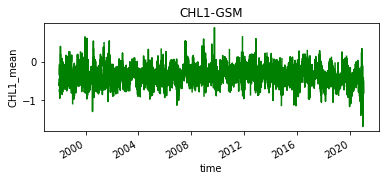

In [59]:
plt.figure(figsize=(6,2))
np.log10(shelf_serie).plot(x='time', color='green',linestyle='-')
plt.title('CHL1-GSM')

Text(0.5, 1.0, 'CHL1-GSM - clorophyll mass monthly mean time serie')

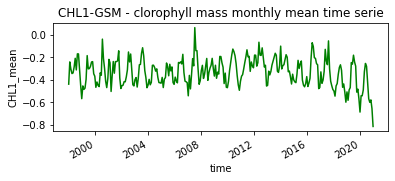

In [61]:
#resample

plt.figure(figsize=(6,2))
np.log10(shelf_serie).resample(
         {'time':'30D'}
     ).mean().plot(x ="time" , color='green',linestyle='-')
plt.title('CHL1-GSM - clorophyll mass monthly mean time serie')


In [ ]:
# monthly mean

In [ ]:
m_shelf = m_chl.where((mask_bat>-200)&(mask_bat<-10))

In [ ]:
mean_shelf_chl1 = m_shelf.mean(['lat','lon'])

In [ ]:
plt.figure(figsize=(6,2))
np.log10(mean_shelf_chl1).plot(x='month', color='green',linestyle='-')
plt.title('CHL1 - ano médio')

#### make a hovmoller

In [9]:
#------------------------- função montar uma matrix para um vetor de batimetria "suave"----------------------------------------------------

def extract_bat(lon,lat,topo,level,flevel):
    CT = plt.contour(gaussian_filter(lon,flevel),
                     gaussian_filter(lat,flevel),gaussian_filter(topo,flevel),
                     [level],colors='black',latlon=True,linewidths=0.7,linestyles='solid')
    # CT = plt.contour(lon,lat,topo,[-100],colors='black',latlon=True,linewidths=0.7,linestyles='solid')
    lli = []
    for i in range(len(CT.allsegs[0])):
        print(CT.allsegs[0][i].shape[0])
        lli.append(CT.allsegs[0][i].shape[0])
        
    lbat = CT.allsegs[0][np.argmax(lli)]
    print('Maior shape é'.format(CT.allsegs[0][np.argmax(lli)].shape))

    return lbat[:,0],lbat[:,1]

In [18]:
def hov_ext_chl1_dist(x,y,subset_file):

    hov_chl1 = []

    xi,yi = x.copy(),y.copy() 

    for i in range(len(xi)):
        print("{:03.1f}%".format(100*(i+1)/len(xi)),end="\r")
        hov_chl1.append(subset_file.sel(lon=xi[i], lat=yi[i], method='nearest'))

    hov_chl1 = xr.concat(hov_chl1,dim='distance')
    hov_chl1 = hov_chl1.assign_coords({'distance':np.hstack([0,np.cumsum(sw.dist(yi,xi)[0])])}) #


    with ProgressBar():
        hov_chl1 = hov_chl1.compute()
        
    #hov_chl1 = hov_chl1.interpolate_na('distance').interpolate_na('time')
    
    return hov_chl1

In [ ]:
#--- SELEÇÃO SEÇÕES DE ACORDO COM A BATIMETRIA SUAVE ---- #


348
Maior shape é
345
Maior shape é


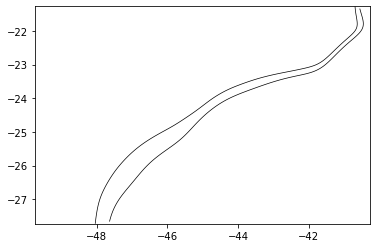

In [37]:
xbat,ybat,zbat = mask_bat.lat.values,mask_bat.lon.values,mask_bat.values

x, y =  extract_bat(ybat, xbat, zbat, level = -80, flevel = 8) # SELECIONANDO VETORES
# x_1, y_1 = extract_bat(ybat, xbat, zbat, level = -100, flevel = 10)
# x_2, y_2 = extract_bat(ybat, xbat, zbat, level = -150, flevel = 10)
x_3, y_3 = extract_bat(ybat, xbat, zbat, level = -200, flevel = 10)


x,y = x[::10],y[::10]
# x_1,y_1 = x_1[::10],y_1[::10] 
# x_2,y_2 = x_2[::10],y_2[::10]
x_3,y_3 = x_3[::10],y_3[::10]

In [13]:
#CHL1_set.time

In [17]:
shelf.time.coords

Coordinates:
  * time     (time) datetime64[ns] 1998-01-01 1998-01-02 ... 2020-12-31

In [39]:
hov_CHL = hov_ext_chl1_dist(x,y,shelf)
# hov_CHL_1 = hov_ext_chl1_dist(x_1,y_1,shelf)
# hov_CHL_2 = hov_ext_chl1_dist(x_2,y_2,shelf)
hov_CHL_3 = hov_ext_chl1_dist(x_3,y_3,shelf)

[########################################] | 100% Completed |  2min  1.2s
[########################################] | 100% Completed |  1min 59.3s


In [42]:
xr.corr(hov_CHL, hov_CHL_3, dim="time")

<xarray.DataArray 'CHL1_mean' (distance: 1)>
array([0.67267853])
Coordinates:
  * distance  (distance) float64 0.0

In [57]:
#hov_CHL

Text(0.5, 1.0, 'CHL1')

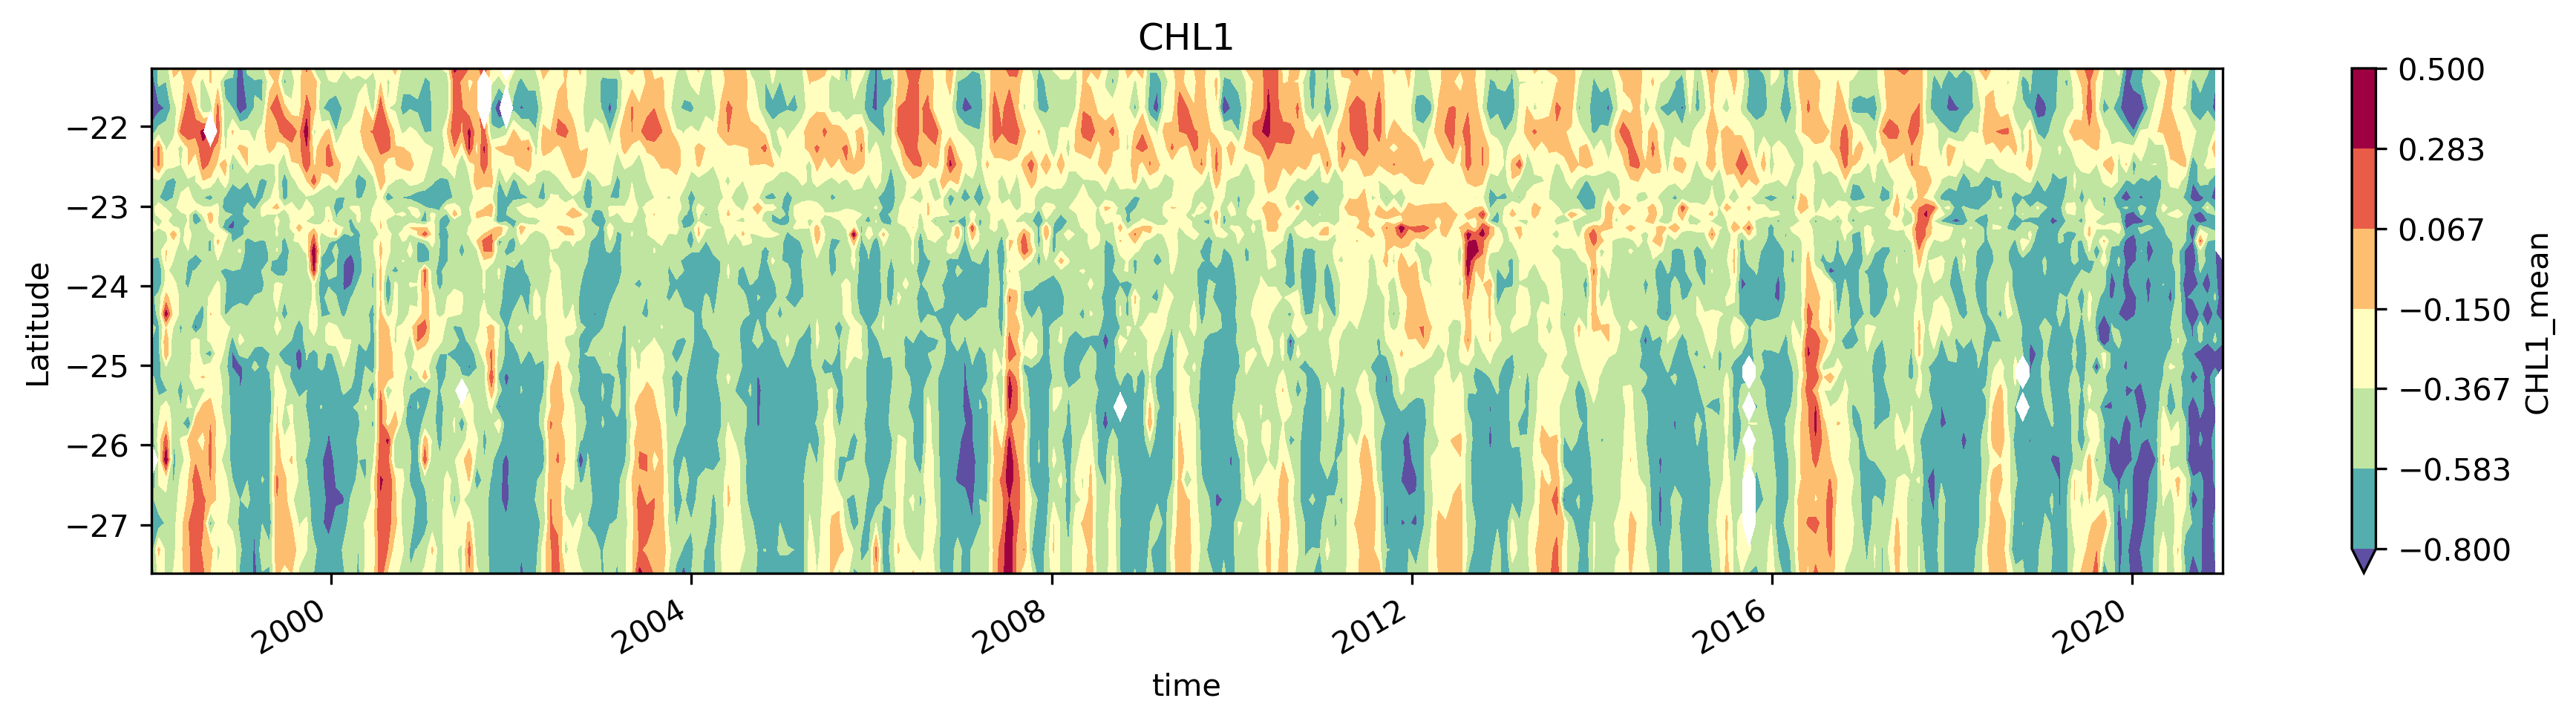

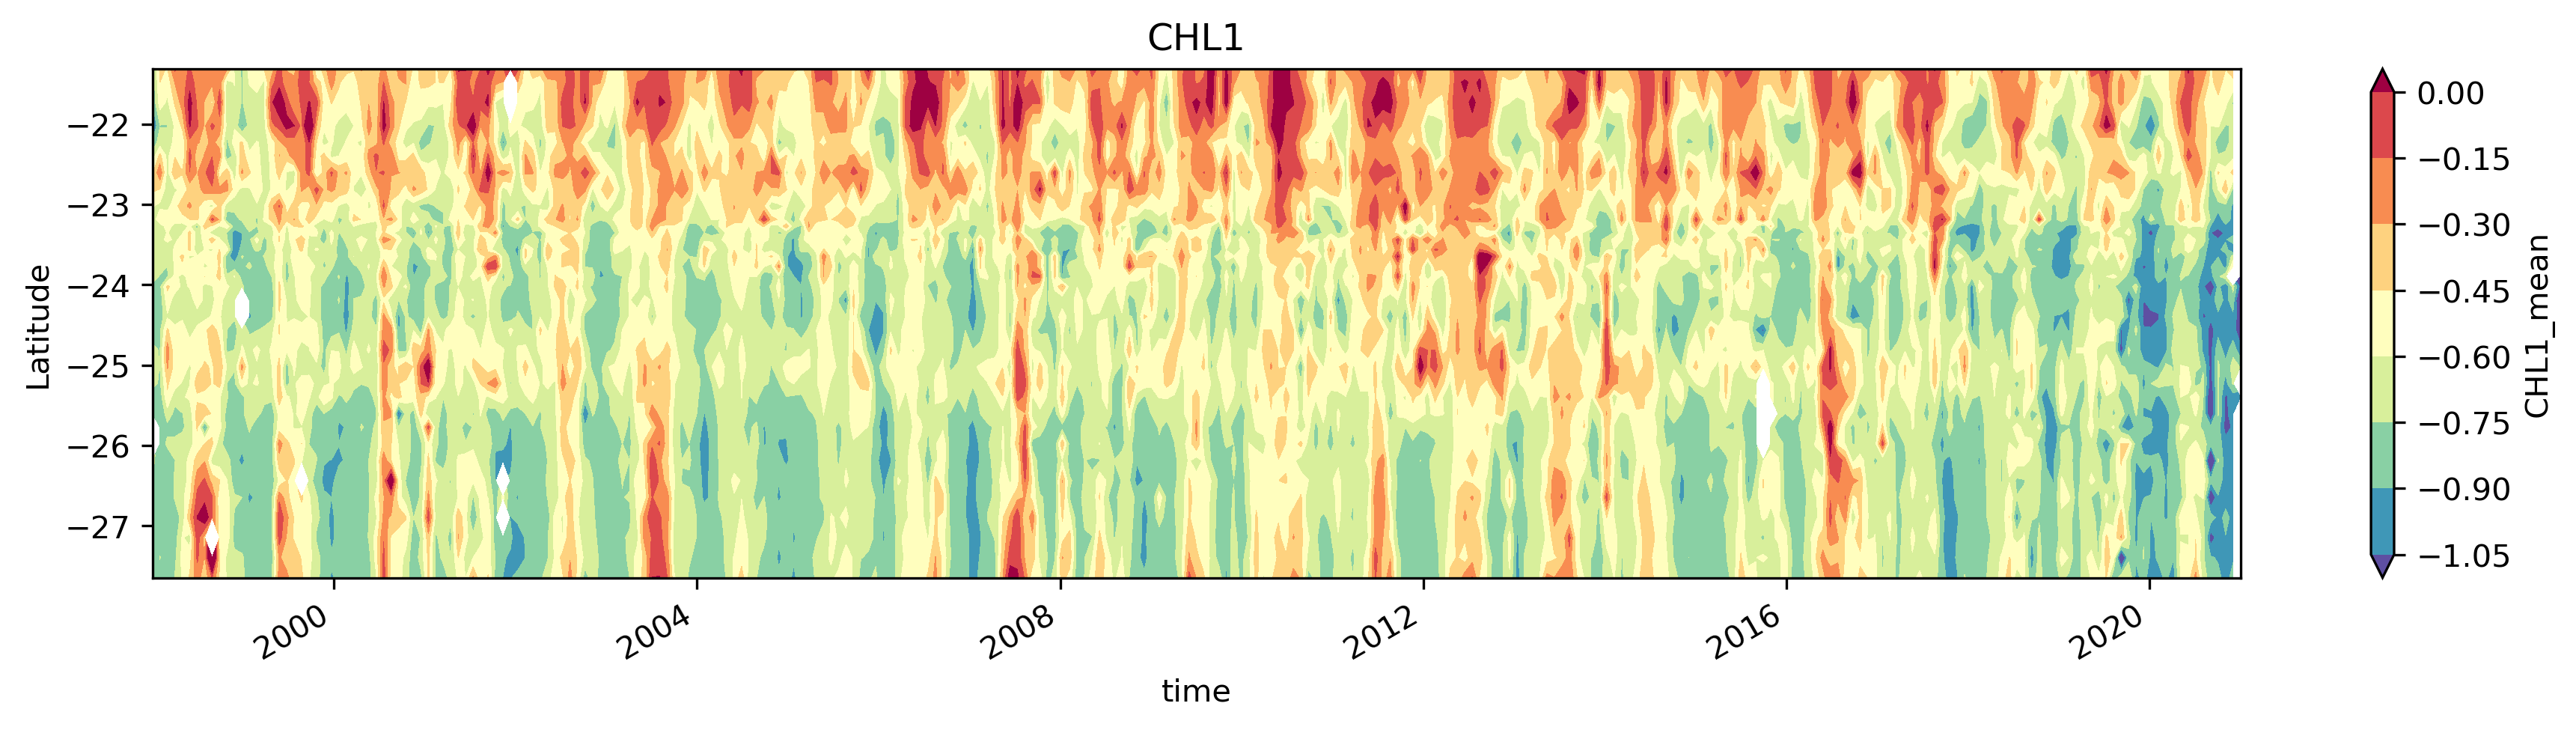

In [56]:
plt.figure(figsize=(15,3), dpi =300)
np.log10(hov_CHL).resample({'time':'30D'}).mean().plot.contourf(
    y='lat', vmin= -0.8 , vmax= 0.5, cmap= 'Spectral_r',robust=True)
#plt.xlabel('month')
plt.ylabel('Latitude')
plt.title('CHL1')
#plt.tight_layout()

plt.figure(figsize=(15,3), dpi =300)
np.log10(hov_CHL_3).resample({'time':'30D'}).mean().plot.contourf(
    y='lat',  cmap= 'Spectral_r',robust=True)
#plt.xlabel('month')
plt.ylabel('Latitude')
plt.title('CHL1')
#plt.tight_layout()

In [64]:
# plt.figure(figsize=(6, 3))
# np.log10(hov_CHL).resample(
#          {'time':'3D'} # reagrupando os dados
#      ).mean().sel(
#          time=slice('2007-01-01','2008-01-01') # slice para um ano especifico
#      ).plot.contourf(y='lat', cmap= cmo.cm.algae,robust=True)
# plt.xlabel('Month')
# plt.ylabel('Latitude [S]')
# plt.title('3-daily mean of chlorophyll along S. Atlantic coastal zone - 2007 - $log_{10}$ [CHL] (m$^{-3}$)')

# plt.figure(figsize=(6, 3))
# np.log10(hov_CHL).resample(
#          {'time':'3D'} # reagrupando os dados
#      ).mean().sel(
#          time=slice('2018-01-01','2019-01-01') # slice para um ano especifico
#      ).plot.contourf(y='lat', cmap= cmo.cm.algae,robust=True)
# plt.xlabel('Month')
# plt.ylabel('Latitude [S]')
# plt.title('3-daily mean of chlorophyll S. Atlantic coastal zone - 2018 - $log_{10}$ [CHL] (m$^{-3}$)')